# Loading & Splitting Dataset

In [334]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def train_test_split(X, Y, test_size):
    dataset_length = len(Y)
    train_length = math.ceil(dataset_length * (1 - test_size))
    return X[:train_length], X[train_length:], Y[:train_length], Y[train_length:]

def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df = pd.read_csv('heartV2.csv')

X = np.array(df[['chol','thalach','thal']])
X = normalization(X)
Y = np.array(df["target"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

b=1


#print(X_train.shape[0])
#print(X_test.shape[0])
#print("y_test : ",y_test2.shape[0],y_test2)
#print("y_test  : ",y_test.shape[0],y_test)
#print("Y-train  : ",y_train.shape[0],y_train)
#print("X_test : ",X_test.shape[0])
#print("y_test : ",y_test.shape[0])
#print("X_test : ",X_test)
#print("y_test : ",y_test)
#print("y_train: ",y_train)

# Plotting The Original Dataset

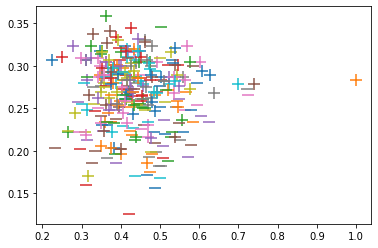

In [335]:
# For every point mark point with - if label is 0 and mark with + if label is 1
for i in range(len(X)):
    if Y[i] == 0 :
        plt.scatter(X[i][0], X[i][1], s=150 ,marker='_')
    else:
        plt.scatter(X[i][0], X[i][1], s=150 ,marker='+' )   


In [336]:
def SVM(X, Y, iteration,alpha):

    w = np.zeros(len(X[0]))
    # The learning rate
    #alpha = 0.01
   
    # Training
    for itera in range(1,iteration):
        for i, x in enumerate(X): # Update Weights Equations
            Lambda = 1/itera
              # It there is an NO error
            if(Y[i] * np.dot(X[i], w) + b ) >=1 :
                      w = w - alpha * (2*Lambda*w)
            else: 
                      w = w + alpha * ( (X[i] * Y[i]) - (2*Lambda*w) ) 
    
    return w

In [349]:
def predict(X, w):
    predict_List = np.dot(X, w) + b
    
    for i in range(len(X)):
        Predict_list[i]=1 if predict_List[i]>=1 else 0
    return  predict_List

In [353]:
def Accurcy(Predict_target):
    count_Accurcy = 0
    for i in range(len(y_test)):
        if(Predict_target[i] == y_test[i] ):
            count_Accurcy +=1 

    return round((count_Accurcy/y_test.shape[0]) * 100 )

In [354]:
w = SVM(X_train,y_train,1000,.1)
p = predict(X_test,w)
print("Accurcy :" , Accurcy(p) ,"%")

Accurcy : 56 %
